**SKLEARN LIBRARY CLASSIFICATION ALGORITHMS COMPARISON**

The data set I used in this kernel contains details of a bank's customers. 

The target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or s/he continues to be a customer.

In order to predict target variables, I will use sklearn classification algorithms:
* Logistic Regression Classification
* K-Nearest Neighbour (KNN) Classification
* Support Vector Machine (SVM) Classification
* Naive Bayes Classification 
* Decision Tree Classification
* Random Forest Classification

After implementing each model, I used score and confusion matrix methods to compare models.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Churn_Modelling.csv']


In [2]:
data = pd.read_csv('../input/Churn_Modelling.csv')

**1. EXPLORATORY DATA ANALYSIS (EDA)**

First of all I need to understand and prepare my data set.

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


I don't need some of columns for my analysis, like customer ID, surname, etc.

In [5]:
data.drop(['RowNumber', 'CustomerId', 'Surname', 'Geography'], axis=1, inplace=True)

I will change customers' gender from Male/Female to 1/0.

In [6]:
data.Gender = [1 if each == 'Male' else 0 for each in data.Gender]

In [7]:
data.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9700,563,0,36,4,143680.47,2,1,1,63531.19,0
9096,569,1,37,9,178755.84,1,1,0,199929.17,0
3446,649,1,37,9,87374.88,2,1,1,247.36,0
8034,622,1,42,9,0.00,2,1,0,119127.06,0
6040,682,1,46,4,0.00,1,1,1,4654.28,0


**Question: ** How many of the customers left the bank?

0    7963
1    2037
Name: Exited, dtype: int64

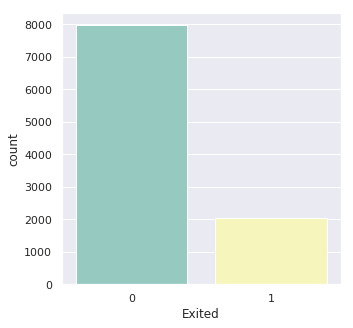

In [8]:
plt.figure(figsize=[5,5])
sns.set(style='darkgrid')
ax = sns.countplot(x='Exited', data=data, palette='Set3')
data.loc[:,'Exited'].value_counts()

**2. SEPARETING FEATURES AND TARGET**

Now separete target feature (y) from other features (x_data).

In [9]:
y = data.Exited.values
x_data = data.drop(['Exited'], axis=1)

In [10]:
x_data.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000


I can see the x_data features has a large scale of numbers. So I need to normalize all the features between 0 and 1.

**3. NORMALIZATION PROCESS**

In [11]:
x = (x_data - np.min(x_data)) / (np.max(x_data)-np.min(x_data))
x.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.538,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735
1,0.516,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709
2,0.304,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654
3,0.698,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120
4,1.000,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400


**4. SPLITTING DATA FOR TRAINING AND TESTING**

I am going to split my data set into as train (x_train, y_train) and test (x_test, y_test) datas.

Then I am going to teach my machine learning algorithms by using trainig data set.

Later I will use my trained model to predict my test data (y_pred).

Finally I will compare my predictions (y_pred) with my test data (y_test).

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=7)

In [13]:
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (9000, 9)
y_train shape:  (9000,)
x_test shape:  (1000, 9)
y_test shape:  (1000,)


Now I can start inplying machine learning algorithms one by one.

**5. LOGISTIC REGRESSION CLASSIFICATION:**

In [14]:
from sklearn.linear_model import LogisticRegression

# Defining the model
lr = LogisticRegression()

# Training the model:
lr.fit(x_train, y_train)

# Predicting target values by using x_test and our model:
y_pred0 = lr.predict(x_test)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


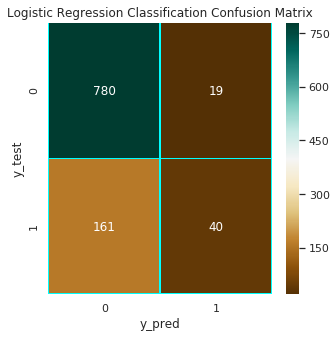

In [15]:
# Confusion matrix for visulalization of our prediction accuracy:
from sklearn.metrics import confusion_matrix

# Creating the confusion matrix:
lr_cm = confusion_matrix(y_test, y_pred0)

#Visualization:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(lr_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('Logistic Regression Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [16]:
score_lr = lr.score(x_test, y_test)
print(score_lr)

0.82


**6. KNN CLASSIFICATION ALGORITHM:**

In [17]:
from sklearn.neighbors import KNeighborsClassifier

# Defining the model with a k number of 13:
knn = KNeighborsClassifier(n_neighbors=13)

# Training the model:
knn.fit(x_train, y_train)

# Predicting target values by using x_test and our model:
y_pred1 = knn.predict(x_test)

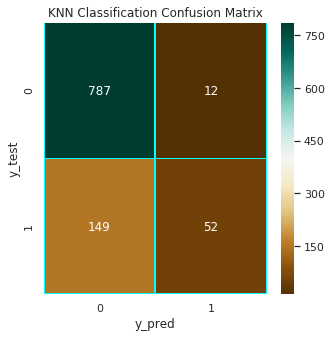

In [18]:
# Confusion matrix for visualization our prediction accuracy:
from sklearn.metrics import confusion_matrix

# Creating the confusion matrix:
knn_cm = confusion_matrix(y_test, y_pred1)

# Visualization:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knn_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('KNN Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [19]:
score_knn = knn.score(x_test, y_test)
print(score_knn)

0.839


**7. SUPPORT VECTOR MACHINE (SVM) ALGORITHM:**

I will use the same x_train and y_train data sets to teach a SVM model. 

In [20]:
from sklearn.svm import SVC

# Defining SVM model
svm = SVC(random_state=2)

# Training model:
svm.fit(x_train, y_train)

# Predicting target values by using x_test and our model:
y_pred2 = svm.predict(x_test)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


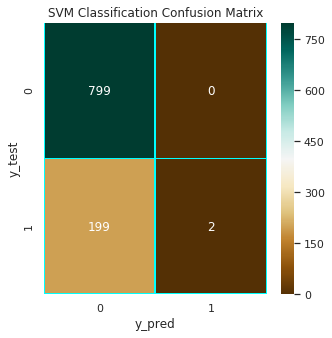

In [21]:
# Confusion matrix for visualization our prediction accuracy:
from sklearn.metrics import confusion_matrix

# Creating the confusion matrix:
svm_cm = confusion_matrix(y_test, y_pred2)

# Visualization:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(svm_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('SVM Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [22]:
score_svm = svm.score(x_test, y_test)
print(score_svm)

0.801


**8. NAIVE BAYES ALGORITHM:**

In [23]:
from sklearn.naive_bayes import GaussianNB

# Defining model:
nb = GaussianNB()

# Training the model:
nb.fit(x_train, y_train)

# Predicting:
y_pred3 = nb.predict(x_test)

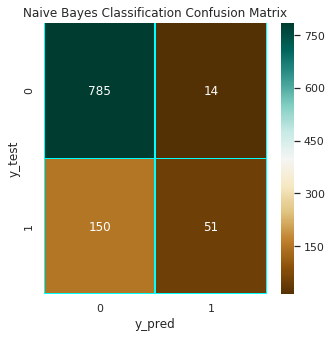

In [24]:
# Confusion matrix for visualization our prediction accuracy:
from sklearn.metrics import confusion_matrix

# Creating the confusion matrix:
nb_cm = confusion_matrix(y_test, y_pred3)

# Visualization:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(nb_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('Naive Bayes Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [25]:
score_nb = nb.score(x_test, y_test)
print(score_nb)

0.836


**9. DECISION TREE ALGORITHM:**

In [26]:
from sklearn.tree import DecisionTreeClassifier

# Defining the model:
dt = DecisionTreeClassifier()

# Training:
dt.fit(x_train, y_train)

# Predicting:
y_pred4 = dt.predict(x_test)

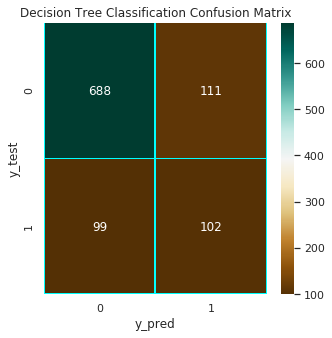

In [27]:
# Confusion matrix for visualization our prediction accuracy:
from sklearn.metrics import confusion_matrix

# Creating the confusion matrix:
dt_cm = confusion_matrix(y_test, y_pred4)

# Visualization:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(dt_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('Decision Tree Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [28]:
score_dt = dt.score(x_test, y_test)
print(score_dt)

0.79


**10. RANDOM FOREST CLASSIFICATION ALGORITHM:**

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Defining:
rf = RandomForestClassifier(n_estimators=100, random_state=3)

# Training:
rf.fit(x_train, y_train)

# Predicting:
y_pred5 = rf.predict(x_test)

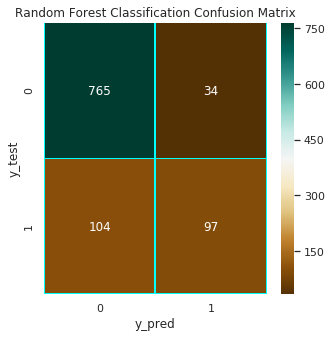

In [30]:
# Confusion matrix for visualization our prediction accuracy:
from sklearn.metrics import confusion_matrix

# Creating the confusion matrix:
rf_cm = confusion_matrix(y_test, y_pred5)

# Visualization:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rf_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [31]:
score_rf = rf.score(x_test, y_test)
print(score_rf)

0.862


**11. COMPARISON OF ALGORITHMS:**

Now it's time to compare our models. 

First of all compare the accuracies:

In [32]:
data_scores = pd.Series([score_lr, score_knn, score_svm, score_nb, score_dt, score_rf], 
                        index=['logistic_regression_score', 'knn_score', 'svm_score', 'naive_bayes_score', 'decision_tree_score', 'random_forest_score']) 
data_scores

logistic_regression_score    0.820
knn_score                    0.839
svm_score                    0.801
naive_bayes_score            0.836
decision_tree_score          0.790
random_forest_score          0.862
dtype: float64

From the accuracy comparison I can see random forest classification gave the best result.

Now I want to see y_test and my models' y_pred values manually:

In [33]:
d = {'y_test': y_test, 'log_reg_pred': y_pred0,'knn_prediction': y_pred1, 
     'svm_prediction': y_pred2, 'naive_bayes_prediction': y_pred3, 
     'decision_tree_prediction': y_pred4, 'random_forest_prediction': y_pred5}
data01 = pd.DataFrame(data=d)
data01.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
y_test,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,...,0,1,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0
log_reg_pred,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
knn_prediction,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
svm_prediction,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
naive_bayes_prediction,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
decision_tree_prediction,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0
random_forest_prediction,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


Finally I want to show my models' confusion matrixes side by side:

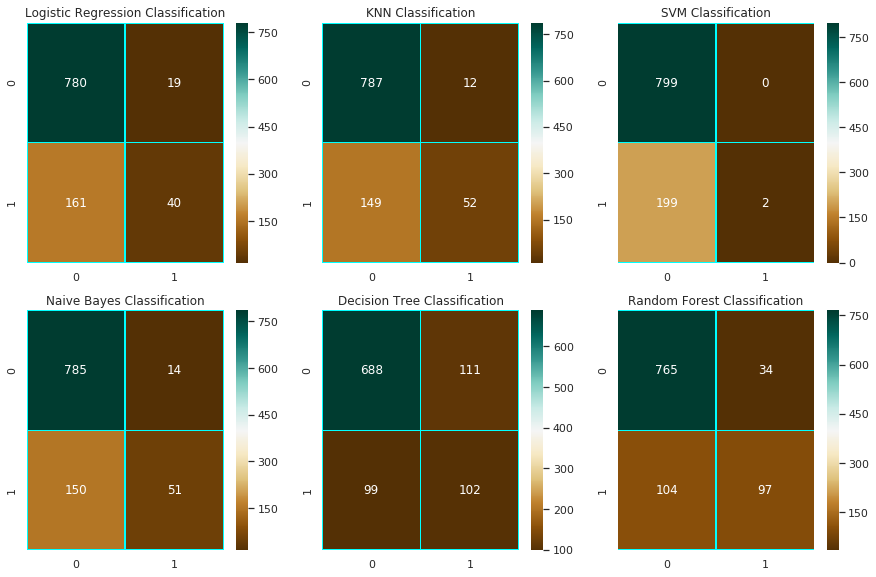

In [34]:
fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(3, 3, 1) # row, column, position
ax1.set_title('Logistic Regression Classification')

ax2 = fig.add_subplot(3, 3, 2) # row, column, position
ax2.set_title('KNN Classification')

ax3 = fig.add_subplot(3, 3, 3)
ax3.set_title('SVM Classification')

ax4 = fig.add_subplot(3, 3, 4)
ax4.set_title('Naive Bayes Classification')

ax5 = fig.add_subplot(3, 3, 5)
ax5.set_title('Decision Tree Classification')

ax6 = fig.add_subplot(3, 3, 6)
ax6.set_title('Random Forest Classification')

sns.heatmap(data=lr_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax1, cmap='BrBG')
sns.heatmap(data=knn_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax2, cmap='BrBG')   
sns.heatmap(data=svm_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax3, cmap='BrBG')
sns.heatmap(data=nb_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax4, cmap='BrBG')
sns.heatmap(data=dt_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax5, cmap='BrBG')
sns.heatmap(data=rf_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax6, cmap='BrBG')
plt.show()